In [6]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install easyocr

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import cv2
import easyocr

from google.colab.patches import cv2_imshow

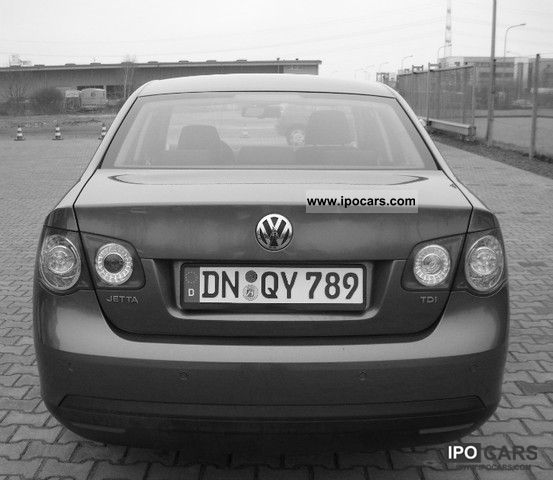

In [28]:
img= cv2.imread("/content/drive/MyDrive/Computer_vision/Traditional Computer Vision/Object detection/OCR (Optical Character Recognition) /R.jpg")

grey= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(grey)

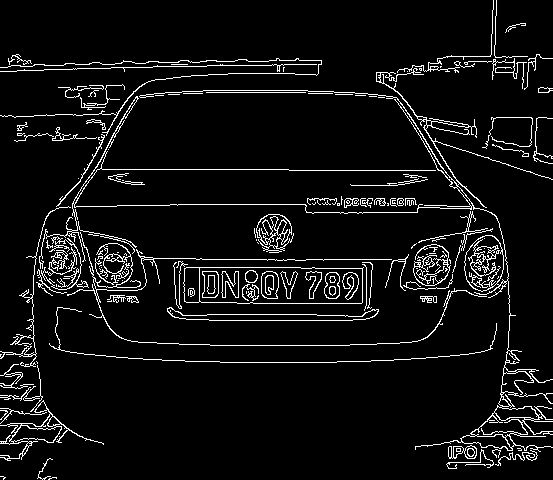

In [10]:
flt= cv2.bilateralFilter(grey, 11, 17, 17)    # Noise reduction, use bilateral becouse it make image smoothy and sharpe edges

edges= cv2.Canny(flt, 30, 200)               # edge detection

cv2_imshow(edges)

In [11]:
keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours= imutils.grab_contours(keypoints)         # di hia hia el find contours bs btbin el values

cons= sorted(contours, key= cv2.contourArea, reverse= True)[:10]

print(len(cons))

10


In [12]:
location = None

for contour in cons:
  approx= cv2.approxPolyDP(contour, 10, True)    # True di bt3br en el shape closed msh open
  # approxpolydp di bt3ml noise reduction ll contours eli malhash lazma y3ni lw ana 3andi no2ta 2oriba ll no2ta bta3t el contour bta3 el object bta3i bmsafa 10 eli hia el epsilon a3mlha reduction

  if len(approx) == 4:
    location = approx
    break

print(location)

[[[184 268]]

 [[186 302]]

 [[362 302]]

 [[363 267]]]


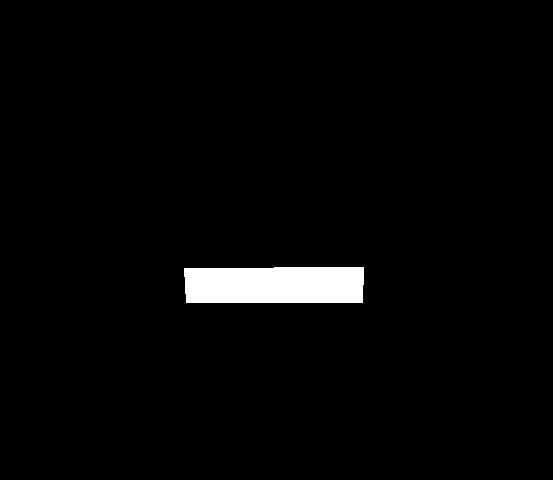

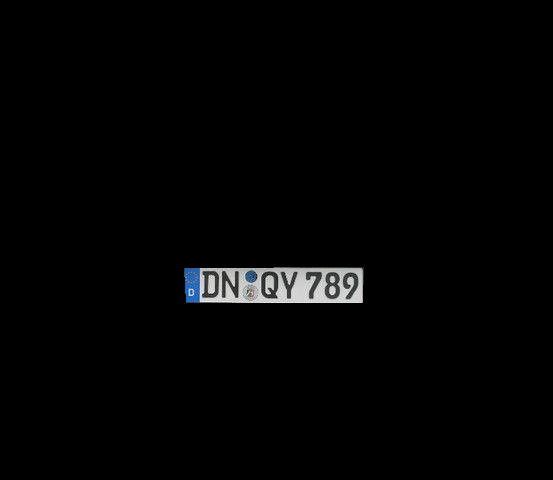

In [17]:
mask= np.zeros(grey.shape, np.uint8)
new_img= cv2.drawContours(mask, [location], 0, 255, -1)
new_image= cv2.bitwise_and(img, img, mask=mask)

cv2_imshow(new_img)
print("\n")
cv2_imshow(new_image)

In [19]:
(x, y)= np.where(mask == 255)
# print(x, y)
(x1, y1)= (np.min(x), np.min(y))
(x2, y2)= (np.max(x), np.max(y))
# print(x1, y1)
# print(x2, y2)

267 184
302 363


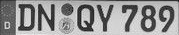

In [24]:
# cv2.rectangle(img, (x2, y2), (x1, y1), (0, 0, 255), 3)
cropped_img= grey[x1: x2, y1: y2]
cv2_imshow(cropped_img)

In [25]:
# OCR

reader= easyocr.Reader(['en'])
result = reader.readtext(cropped_img)           # Returns text, accuracy

print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[15, 0], [179, 0], [179, 35], [15, 35]], 'DN:QY 789', 0.6138550334171222)]


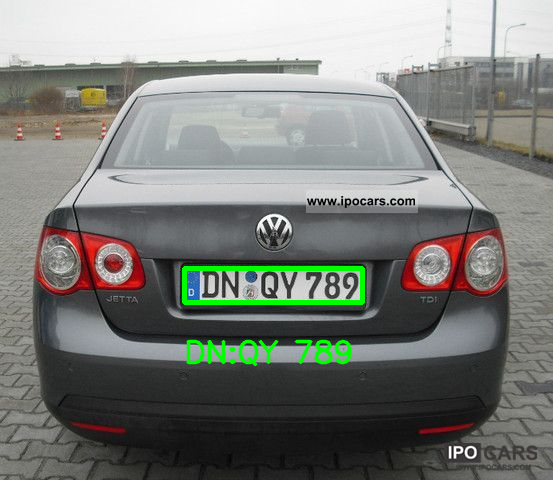

In [29]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
cv2_imshow(res)